In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df1 = pd.read_csv('DE_1_filter.csv')
df2 = pd.read_csv('DE_2_filter.csv')
df3 = pd.read_csv('DE_3_filter.csv')
df4 = pd.read_csv('DE_4_filter.csv')
df5 = pd.read_csv('DE_5_filter.csv')

In [3]:
df1.shape

(60797, 150)

In [4]:
df2.shape

(60869, 150)

In [5]:
df3.shape

(60813, 150)

In [6]:
df4.shape

(60791, 150)

In [7]:
df5.shape

(60902, 150)

In [36]:
df_cv_5 = pd.concat([df1, df2], axis=0)

In [37]:
df_cv_5.shape

(121666, 150)

In [38]:
df_cv_5 = pd.concat([df_cv_5, df3], axis=0)

In [39]:
df_cv_5 = pd.concat([df_cv_5, df4], axis=0)

In [40]:
df_cv_5.shape

(243270, 150)

In [41]:
df_cv_5.to_csv('DE_cv_5_filter.csv')

In [42]:
print (df_cv_5.dtypes)

Unnamed: 0        int64
Unnamed: 0.1     object
weight          float64
Finished          int64
RecordedDate     object
                 ...   
E2.3              int64
E2.NA             int64
D1.-88          float64
D2.-88          float64
D4.-88          float64
Length: 150, dtype: object


## Training & Test

In [43]:
df_train_5 = pd.read_csv('DE_cv_5_filter.csv')
df_train_4 = pd.read_csv('DE_cv_4_filter.csv')
df_train_3 = pd.read_csv('DE_cv_3_filter.csv')
df_train_2 = pd.read_csv('DE_cv_2_filter.csv')
df_train_1 = pd.read_csv('DE_cv_1_filter.csv')

In [44]:
df_train_5.shape

(243270, 151)

In [45]:
df_test_5 = pd.read_csv('DE_5_filter.csv')
df_test_4 = pd.read_csv('DE_4_filter.csv')
df_test_3 = pd.read_csv('DE_3_filter.csv')
df_test_2 = pd.read_csv('DE_2_filter.csv')
df_test_1 = pd.read_csv('DE_1_filter.csv')

In [48]:
df_train_5.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'weight',
       'Finished', 'RecordedDate', 'B2', 'B4', 'E5', 'ISO_3',
       'country_agg', 'region_agg', 'date_from_file', 'date', 'ISO2',
       'age', 'B1_1.1', 'B1_1.2', 'B1_1.NA', 'B1_2.1', 'B1_2.2',
       'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA', 'B1_4.1', 'B1_4.2',
       'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA', 'B1_6.1', 'B1_6.2',
       'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA', 'B1_8.1', 'B1_8.2',
       'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA', 'B1_10.1', 'B1_10.2',
       'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA', 'B1_12.1', 'B1_12.2',
       'B1_12.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1', 'B5.2', 'B5.NA',
       'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA', 'B8.1', 'B8.2',
       'B8.3', 'B8.NA', 'C0_1.1', 'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2',
       'C0_2.NA', 'C0_3.1', 'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2',
       'C0_4.NA', 'C0_5.1', 'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2',
       'C0_6.NA', 'C1_m.1', 'C

In [49]:
X_train_5 = df_train_5.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_train_5 = df_train_5['B8.1']

X_train_4 = df_train_4.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_train_4 = df_train_4['B8.1']

X_train_3 = df_train_3.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_train_3 = df_train_3['B8.1']

X_train_2 = df_train_2.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_train_2 = df_train_2['B8.1']

X_train_1 = df_train_1.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_train_1 = df_train_1['B8.1']

In [55]:
X_train_5.shape

(243270, 92)

In [56]:
Y_train_5.shape

(243270,)

In [50]:
X_train_5.columns.values

array(['B1_1.1', 'B1_1.2', 'B1_2.1', 'B1_2.2', 'B1_3.1', 'B1_3.2',
       'B1_4.1', 'B1_4.2', 'B1_5.1', 'B1_5.2', 'B1_6.1', 'B1_6.2',
       'B1_7.1', 'B1_7.2', 'B1_8.1', 'B1_8.2', 'B1_9.1', 'B1_9.2',
       'B1_10.1', 'B1_10.2', 'B1_11.1', 'B1_11.2', 'B1_12.1', 'B1_12.2',
       'B3.1', 'B3.2', 'B5.1', 'B5.2', 'B6.1', 'B6.2', 'C0_1.1', 'C0_1.2',
       'C0_2.1', 'C0_2.2', 'C0_3.1', 'C0_3.2', 'C0_4.1', 'C0_4.2',
       'C0_5.1', 'C0_5.2', 'C0_6.1', 'C0_6.2', 'C1_m.1', 'C1_m.2', 'C2.1',
       'C2.2', 'C2.3', 'C2.4', 'C3.1', 'C3.2', 'C5.1', 'C5.2', 'C5.3',
       'C5.4', 'C5.5', 'C5.6', 'C6.1', 'C6.2', 'C6.3', 'C6.4', 'D1.1',
       'D1.2', 'D1.3', 'D1.4', 'D1.5', 'D2.1', 'D2.2', 'D2.3', 'D2.4',
       'D2.5', 'D3.1', 'D3.2', 'D3.3', 'D3.4', 'D4.1', 'D4.2', 'D4.3',
       'D4.4', 'E3.1', 'E3.2', 'E3.3', 'E3.4', 'E4.1', 'E4.2', 'E4.3',
       'E4.4', 'E4.5', 'E4.6', 'E4.7', 'E2.1', 'E2.2', 'E2.3'],
      dtype=object)

In [51]:
df_test_5.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'weight', 'Finished', 'RecordedDate',
       'B2', 'B4', 'E5', 'ISO_3', 'country_agg', 'region_agg',
       'date_from_file', 'date', 'ISO2', 'age', 'B1_1.1', 'B1_1.2',
       'B1_1.NA', 'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2',
       'B1_3.NA', 'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2',
       'B1_5.NA', 'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2',
       'B1_7.NA', 'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2',
       'B1_9.NA', 'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2',
       'B1_11.NA', 'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B3.1', 'B3.2',
       'B3.NA', 'B5.1', 'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1',
       'B7.2', 'B7.NA', 'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1',
       'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1',
       'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2', 'C0_4.NA', 'C0_5.1',
       'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2', 'C0_6.NA', 'C1_m.1',
       'C1_m.2', 'C1_m.NA',

In [52]:
X_test_5 = df_test_5.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_test_5 = df_test_5['B8.1']

X_test_4 = df_test_4.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_test_4 = df_test_4['B8.1']

X_test_3 = df_test_3.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_test_3 = df_test_3['B8.1']

X_test_2 = df_test_2.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_test_2 = df_test_2['B8.1']

X_test_1 = df_test_1.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88'], axis=1)
Y_test_1 = df_test_1['B8.1']

In [53]:
X_test_5.shape

(60902, 92)

In [54]:
Y_test_5.shape

(60902,)

# Decision Tree

In [57]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50,100,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [58]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [59]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1')

dtree_model=dtree_model.fit(X_train_5, Y_train_5)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 50}


In [60]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_5, Y_train_5)

y_pred_5 = my_model.predict(X_test_5)

Accuracy Score: 0.9773406456274014
Area Under Curve: 0.7093942448844608
Recall score: 0.4233160621761658

Specificity: 0.9954724275927559
F1 score: 0.542136695421367
Precision score: 0.753690036900369
[[58705   267]
 [ 1113   817]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58972
           1       0.75      0.42      0.54      1930

    accuracy                           0.98     60902
   macro avg       0.87      0.71      0.77     60902
weighted avg       0.97      0.98      0.97     60902



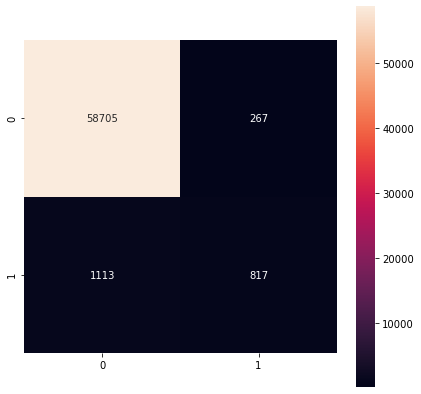

In [61]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_5,y_pred_5)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_5, y_pred_5)}')
print(f'Recall score: {recall_score(Y_test_5,y_pred_5)}')
print("")
matrix = confusion_matrix(Y_test_5, y_pred_5)
tn, fp, fn, tp = confusion_matrix(Y_test_5, y_pred_5).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_5,y_pred_5)}')
print(f'Precision score: {precision_score(Y_test_5,y_pred_5)}')
print(matrix)
print("")
print(classification_report(Y_test_5, y_pred_5))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

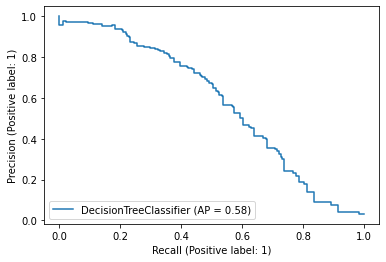

In [62]:
disp = plot_precision_recall_curve(my_model, X_test_5, Y_test_5)

In [63]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [64]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train_5)

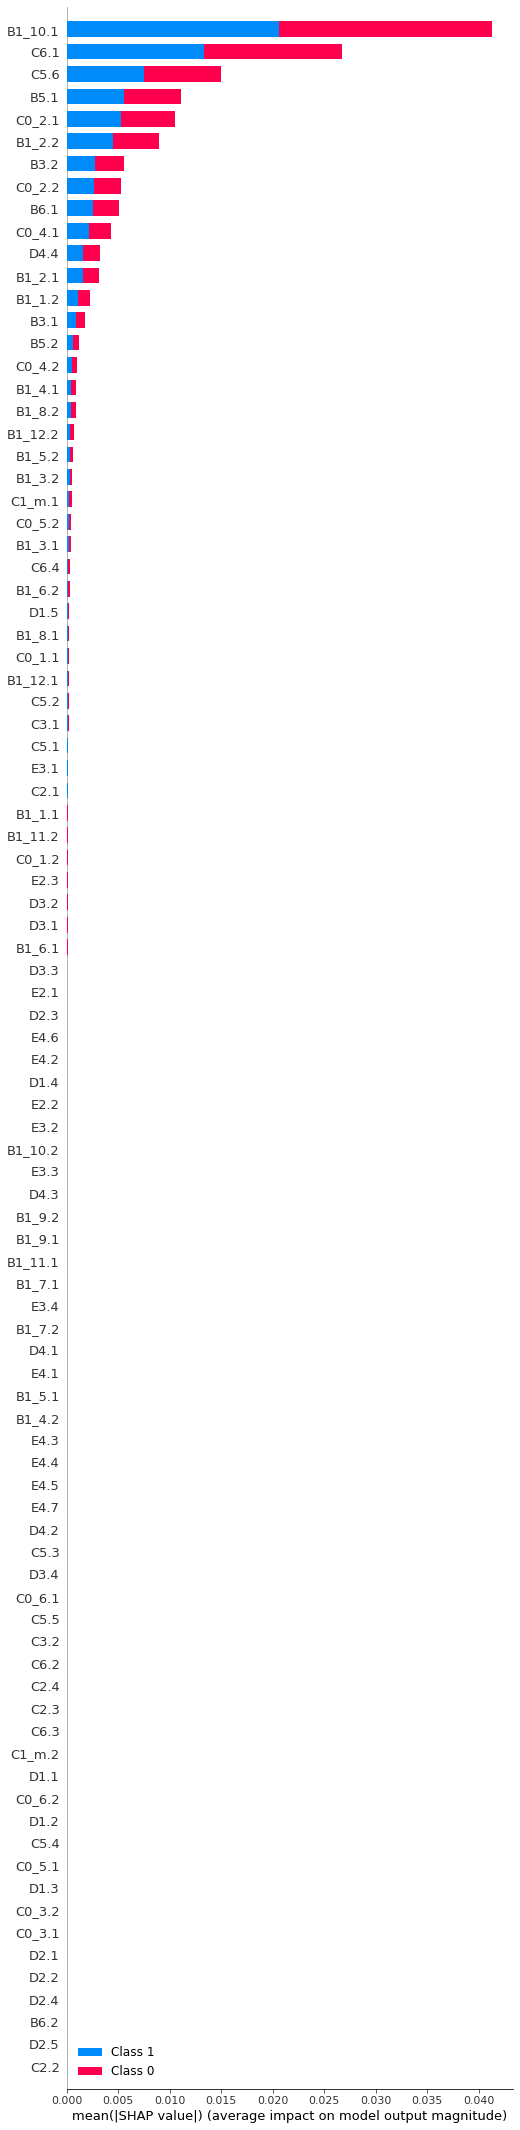

In [65]:
shap.summary_plot(shap_values, features=X_train_5, feature_names=X_train_5.columns, max_display=len(X_train_5.columns))

In [67]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1',verbose=-1)

dtree_model=dtree_model.fit(X_train_4, Y_train_4)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 100}


In [68]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_4, Y_train_4)

y_pred_4 = my_model.predict(X_test_4)

Accuracy Score: 0.9779408136072774
Area Under Curve: 0.7235236852258558
Recall score: 0.451417004048583

Specificity: 0.9956303664031284
F1 score: 0.5708799999999999
Precision score: 0.7763272410791993
[[58558   257]
 [ 1084   892]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58815
           1       0.78      0.45      0.57      1976

    accuracy                           0.98     60791
   macro avg       0.88      0.72      0.78     60791
weighted avg       0.98      0.98      0.98     60791



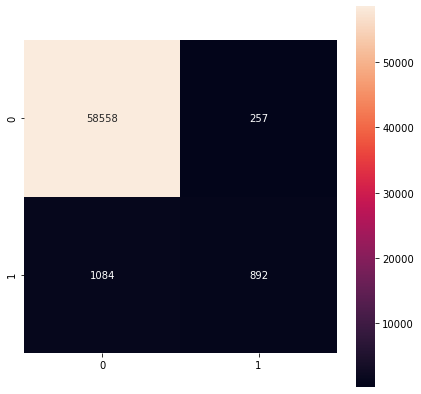

In [69]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_4,y_pred_4)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_4, y_pred_4)}')
print(f'Recall score: {recall_score(Y_test_4,y_pred_4)}')
print("")
matrix = confusion_matrix(Y_test_4, y_pred_4)
tn, fp, fn, tp = confusion_matrix(Y_test_4, y_pred_4).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_4,y_pred_4)}')
print(f'Precision score: {precision_score(Y_test_4,y_pred_4)}')
print(matrix)
print("")
print(classification_report(Y_test_4, y_pred_4))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

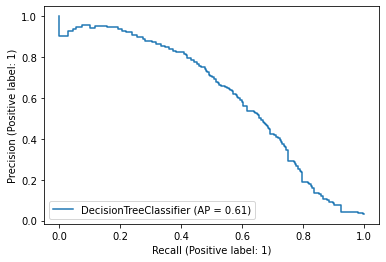

In [70]:
disp = plot_precision_recall_curve(my_model, X_test_4, Y_test_4)

In [71]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train_4)

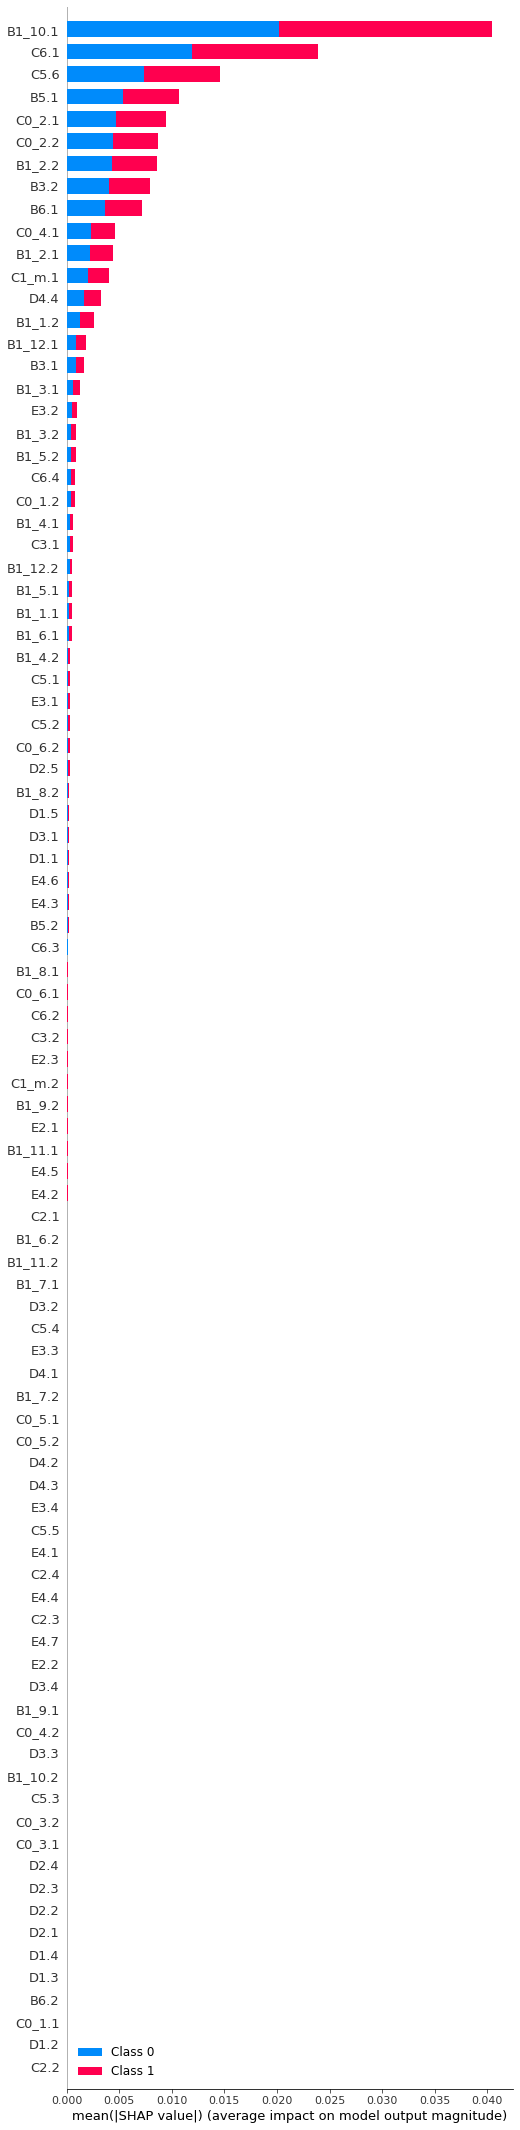

In [72]:
shap.summary_plot(shap_values, features=X_train_4, feature_names=X_train_4.columns, max_display=len(X_train_4.columns))

In [73]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1')

dtree_model=dtree_model.fit(X_train_3, Y_train_3)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 50}


In [74]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_3, Y_train_3)

y_pred_3 = my_model.predict(X_test_3)

Accuracy Score: 0.979132751220956
Area Under Curve: 0.7248639489448364
Recall score: 0.4541036717062635

Specificity: 0.9956242261834094
F1 score: 0.5699762792273805
Precision score: 0.7652411282984531
[[58703   258]
 [ 1011   841]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58961
           1       0.77      0.45      0.57      1852

    accuracy                           0.98     60813
   macro avg       0.87      0.72      0.78     60813
weighted avg       0.98      0.98      0.98     60813



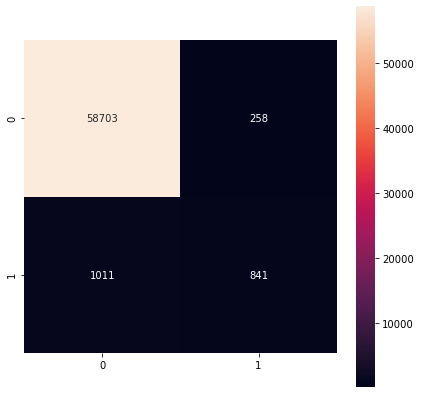

In [75]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_3,y_pred_3)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_3, y_pred_3)}')
print(f'Recall score: {recall_score(Y_test_3,y_pred_3)}')
print("")
matrix = confusion_matrix(Y_test_3, y_pred_3)
tn, fp, fn, tp = confusion_matrix(Y_test_3, y_pred_3).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_3,y_pred_3)}')
print(f'Precision score: {precision_score(Y_test_3,y_pred_3)}')
print(matrix)
print("")
print(classification_report(Y_test_3, y_pred_3))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

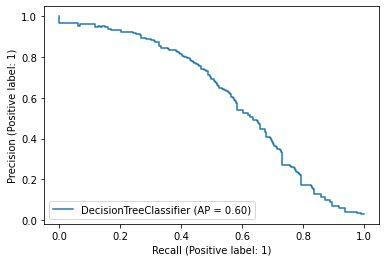

In [76]:
disp = plot_precision_recall_curve(my_model, X_test_3, Y_test_3)

In [77]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train_3)

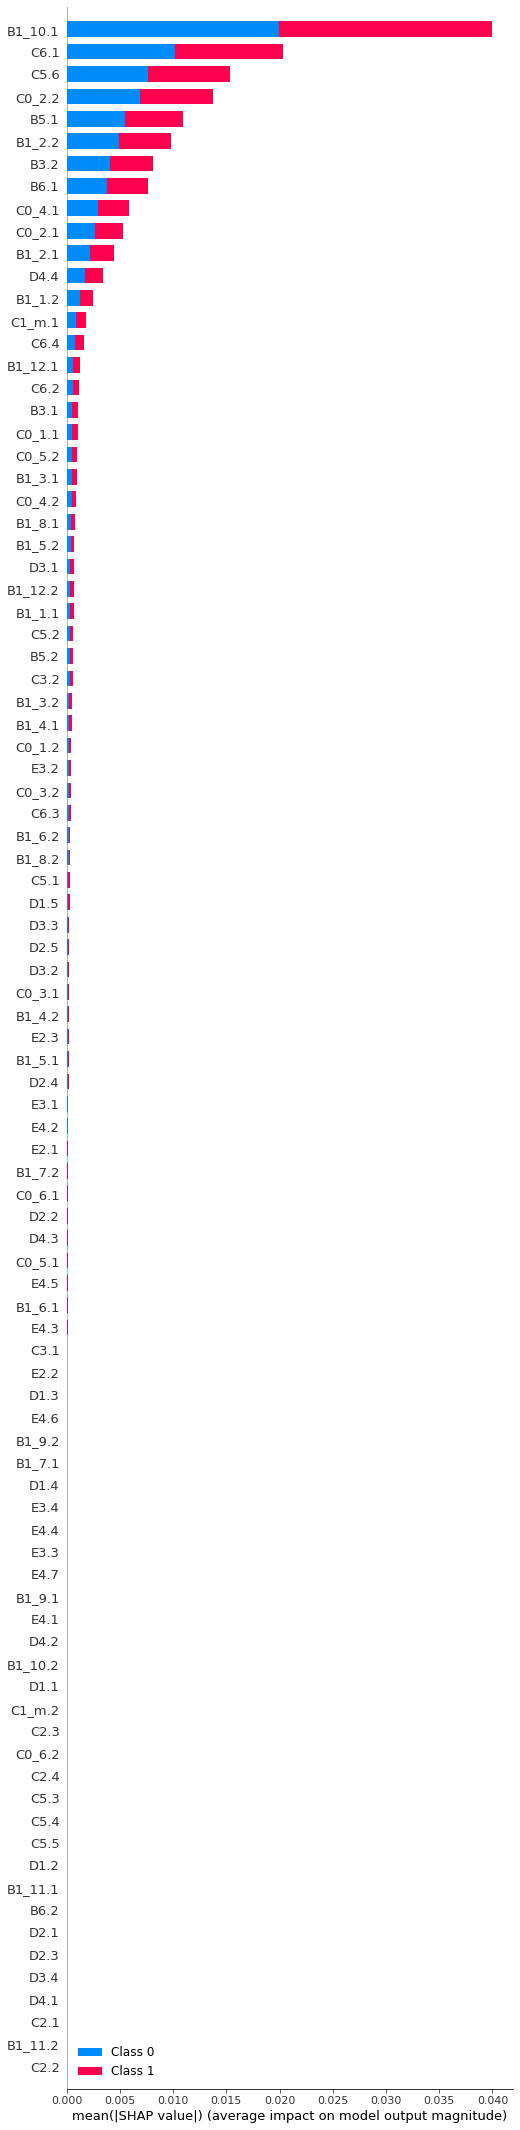

In [78]:
shap.summary_plot(shap_values, features=X_train_3, feature_names=X_train_3.columns, max_display=len(X_train_3.columns))

In [79]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1')

dtree_model=dtree_model.fit(X_train_2, Y_train_2)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 50}


In [80]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_2, Y_train_2)

y_pred_2 = my_model.predict(X_test_2)

Accuracy Score: 0.9782319407251638
Area Under Curve: 0.7133670384644017
Recall score: 0.43073706220595925

Specificity: 0.9959970147228442
F1 score: 0.5543222334342416
Precision score: 0.7773584905660378
[[58720   236]
 [ 1089   824]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58956
           1       0.78      0.43      0.55      1913

    accuracy                           0.98     60869
   macro avg       0.88      0.71      0.77     60869
weighted avg       0.98      0.98      0.98     60869



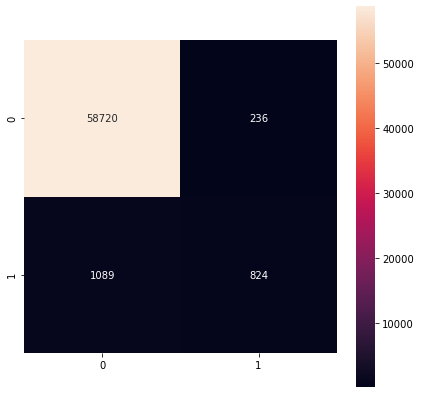

In [81]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_2,y_pred_2)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_2, y_pred_2)}')
print(f'Recall score: {recall_score(Y_test_2,y_pred_2)}')
print("")
matrix = confusion_matrix(Y_test_2, y_pred_2)
tn, fp, fn, tp = confusion_matrix(Y_test_2, y_pred_2).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_2,y_pred_2)}')
print(f'Precision score: {precision_score(Y_test_2,y_pred_2)}')
print(matrix)
print("")
print(classification_report(Y_test_2, y_pred_2))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

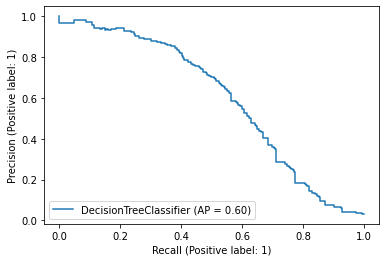

In [82]:
disp = plot_precision_recall_curve(my_model, X_test_2, Y_test_2)

In [83]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train_2)

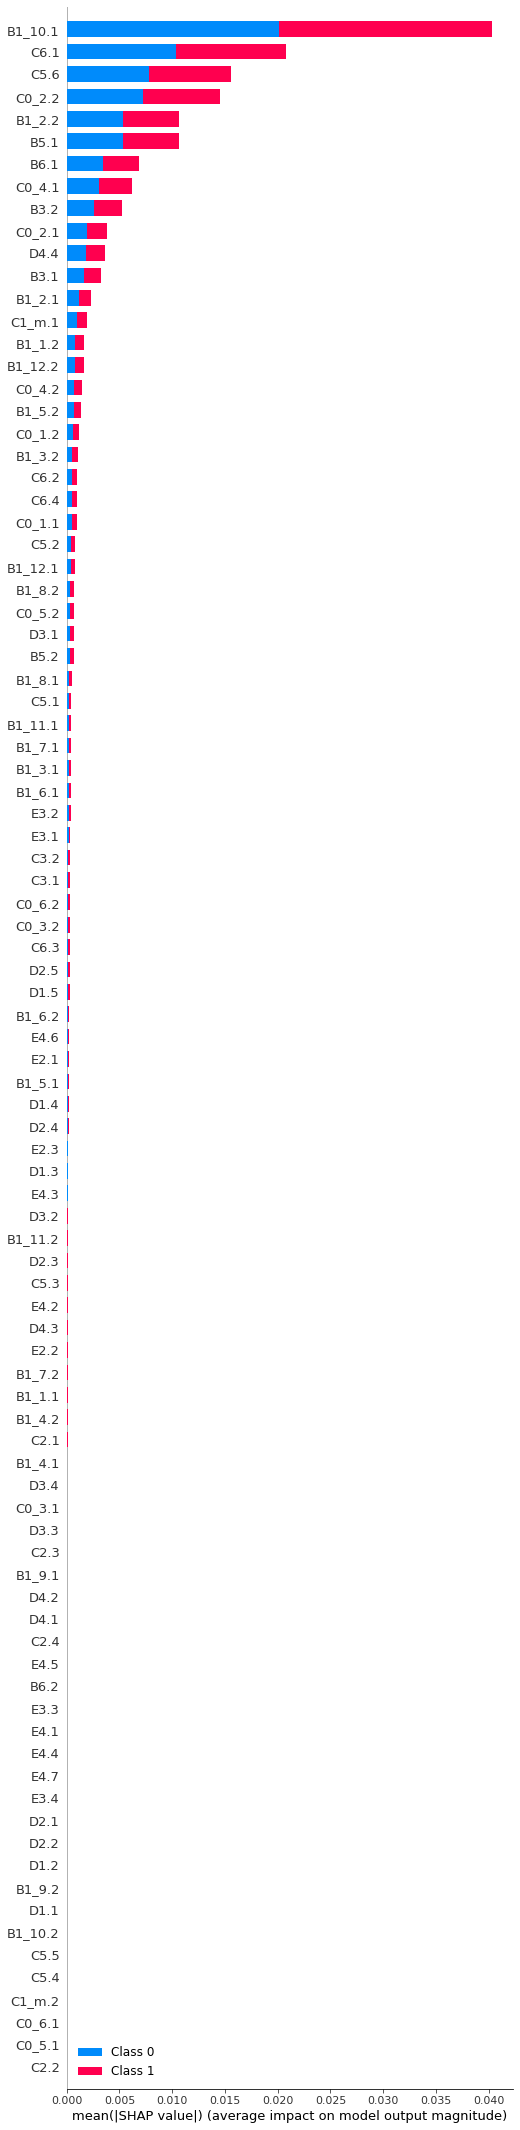

In [84]:
shap.summary_plot(shap_values, features=X_train_2, feature_names=X_train_2.columns, max_display=len(X_train_2.columns))

In [85]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1')

dtree_model=dtree_model.fit(X_train_1, Y_train_1)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 200}


In [86]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_1, Y_train_1)

y_pred_1 = my_model.predict(X_test_1)

Accuracy Score: 0.9762488280671744
Area Under Curve: 0.7104687916668889
Recall score: 0.42587064676616915

Specificity: 0.9950669365676085
F1 score: 0.5424588086185044
Precision score: 0.7469458987783595
[[58497   290]
 [ 1154   856]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58787
           1       0.75      0.43      0.54      2010

    accuracy                           0.98     60797
   macro avg       0.86      0.71      0.77     60797
weighted avg       0.97      0.98      0.97     60797



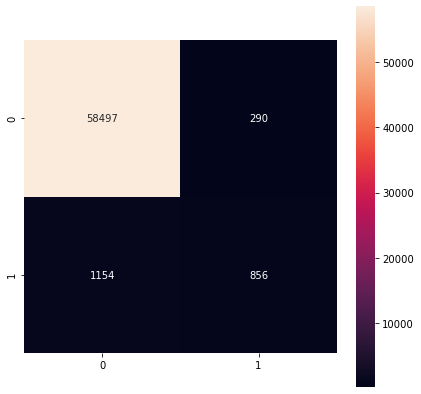

In [87]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_1,y_pred_1)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_1, y_pred_1)}')
print(f'Recall score: {recall_score(Y_test_1,y_pred_1)}')
print("")
matrix = confusion_matrix(Y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(Y_test_1, y_pred_1).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_1,y_pred_1)}')
print(f'Precision score: {precision_score(Y_test_1,y_pred_1)}')
print(matrix)
print("")
print(classification_report(Y_test_1, y_pred_1))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

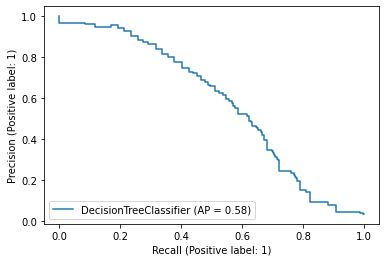

In [88]:
disp = plot_precision_recall_curve(my_model, X_test_1, Y_test_1)

In [89]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train_1)

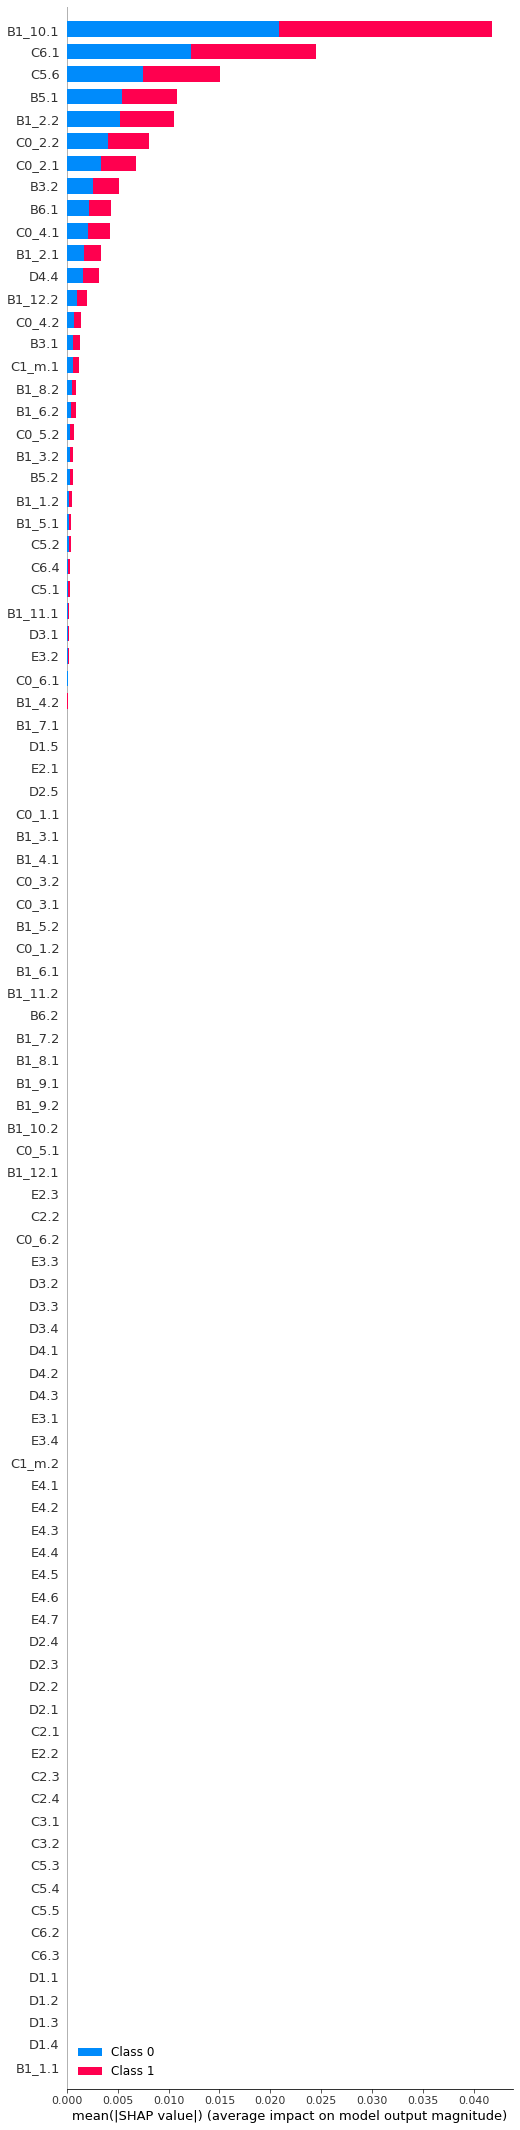

In [90]:
shap.summary_plot(shap_values, features=X_train_1, feature_names=X_train_1.columns, max_display=len(X_train_1.columns))

## Results

In [91]:
list_acc=[]
list_roc=[]
list_recall=[]
list_f1=[]
list_precision=[]


list_acc.append(accuracy_score(Y_test_1,y_pred_1))
list_acc.append(accuracy_score(Y_test_2,y_pred_2))
list_acc.append(accuracy_score(Y_test_3,y_pred_3))
list_acc.append(accuracy_score(Y_test_4,y_pred_4))
list_acc.append(accuracy_score(Y_test_5,y_pred_5))

list_roc.append(roc_auc_score(Y_test_1, y_pred_1))
list_roc.append(roc_auc_score(Y_test_2, y_pred_2))
list_roc.append(roc_auc_score(Y_test_3, y_pred_3))
list_roc.append(roc_auc_score(Y_test_4, y_pred_4))
list_roc.append(roc_auc_score(Y_test_5, y_pred_5))

list_recall.append(recall_score(Y_test_1,y_pred_1))
list_recall.append(recall_score(Y_test_2,y_pred_2))
list_recall.append(recall_score(Y_test_3,y_pred_3))
list_recall.append(recall_score(Y_test_4,y_pred_4))
list_recall.append(recall_score(Y_test_5,y_pred_5))


list_f1.append(f1_score(Y_test_1,y_pred_1))
list_f1.append(f1_score(Y_test_2,y_pred_2))
list_f1.append(f1_score(Y_test_3,y_pred_3))
list_f1.append(f1_score(Y_test_4,y_pred_4))
list_f1.append(f1_score(Y_test_5,y_pred_5))

list_precision.append(precision_score(Y_test_1,y_pred_1))
list_precision.append(precision_score(Y_test_2,y_pred_2))
list_precision.append(precision_score(Y_test_3,y_pred_3))
list_precision.append(precision_score(Y_test_4,y_pred_4))
list_precision.append(precision_score(Y_test_5,y_pred_5))



print('Accuracy Score:',np.mean(list_acc))
print('Area Under Curve:',np.mean(list_roc))
print('Recall score:',np.mean(list_recall))
print('F1 score:',np.mean(list_f1))
print('Precision score:',np.mean(list_precision))


Accuracy Score: 0.9777789958495946
Area Under Curve: 0.7163235418372887
Recall score: 0.4370888893806281
F1 score: 0.5559548033402987
Precision score: 0.7639125591244836


# LogisticRegression

In [92]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [93]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train_5,Y_train_5)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.5605928077040512 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [94]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train_5,Y_train_5)
# test
y_pred_5 = lg3.predict(X_test_5)

Accuracy Score: 0.978046697973794
Area Under Curve: 0.7162741323800282
Recall score: 0.4367875647668394

Specificity: 0.9957606999932171
F1 score: 0.5577241151174331
Precision score: 0.7712717291857274
[[58722   250]
 [ 1087   843]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58972
           1       0.77      0.44      0.56      1930

    accuracy                           0.98     60902
   macro avg       0.88      0.72      0.77     60902
weighted avg       0.98      0.98      0.98     60902



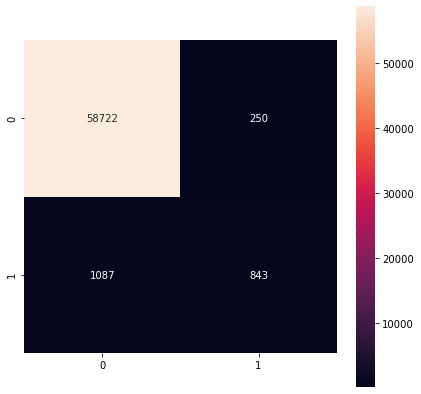

In [95]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_5,y_pred_5)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_5, y_pred_5)}')
print(f'Recall score: {recall_score(Y_test_5,y_pred_5)}')
print("")
matrix = confusion_matrix(Y_test_5, y_pred_5)
tn, fp, fn, tp = confusion_matrix(Y_test_5, y_pred_5).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_5,y_pred_5)}')
print(f'Precision score: {precision_score(Y_test_5,y_pred_5)}')
print(matrix)
print("")
print(classification_report(Y_test_5, y_pred_5))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

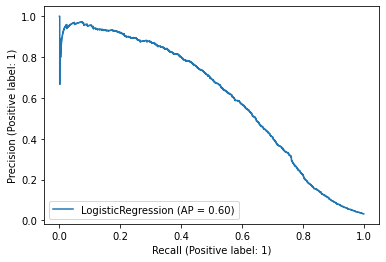

In [96]:
disp = plot_precision_recall_curve(lg3, X_test_5, Y_test_5)

In [97]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train_4,Y_train_4)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.5579856311327064 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [98]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train_4,Y_train_4)
# test
y_pred_4 = lg3.predict(X_test_4)

Accuracy Score: 0.9776447171456301
Area Under Curve: 0.7236151982422067
Recall score: 0.4519230769230769

Specificity: 0.9953073195613364
F1 score: 0.5678855325914149
Precision score: 0.7639007698887939
[[58539   276]
 [ 1083   893]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58815
           1       0.76      0.45      0.57      1976

    accuracy                           0.98     60791
   macro avg       0.87      0.72      0.78     60791
weighted avg       0.97      0.98      0.97     60791



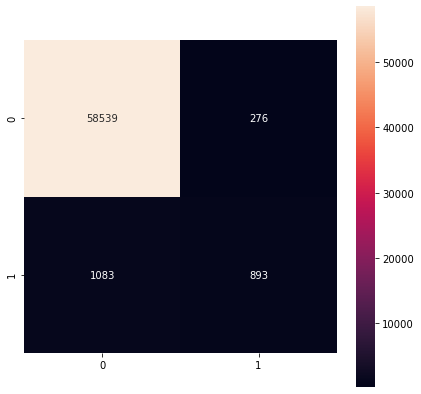

In [99]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_4,y_pred_4)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_4, y_pred_4)}')
print(f'Recall score: {recall_score(Y_test_4,y_pred_4)}')
print("")
matrix = confusion_matrix(Y_test_4, y_pred_4)
tn, fp, fn, tp = confusion_matrix(Y_test_4, y_pred_4).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_4,y_pred_4)}')
print(f'Precision score: {precision_score(Y_test_4,y_pred_4)}')
print(matrix)
print("")
print(classification_report(Y_test_4, y_pred_4))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

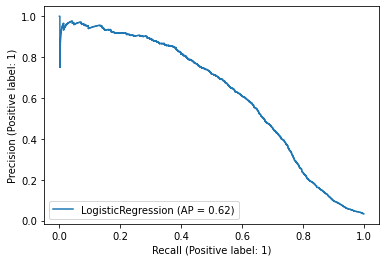

In [100]:
disp = plot_precision_recall_curve(lg3, X_test_4, Y_test_4)

In [101]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train_3,Y_train_3)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.5629790561732126 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [102]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train_3,Y_train_3)
# test
y_pred_3 = lg3.predict(X_test_3)

Accuracy Score: 0.9786065479420518
Area Under Curve: 0.7157016436497193
Recall score: 0.4357451403887689

Specificity: 0.9956581469106698
F1 score: 0.5536878216123499
Precision score: 0.7591721542803387
[[58705   256]
 [ 1045   807]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58961
           1       0.76      0.44      0.55      1852

    accuracy                           0.98     60813
   macro avg       0.87      0.72      0.77     60813
weighted avg       0.98      0.98      0.98     60813



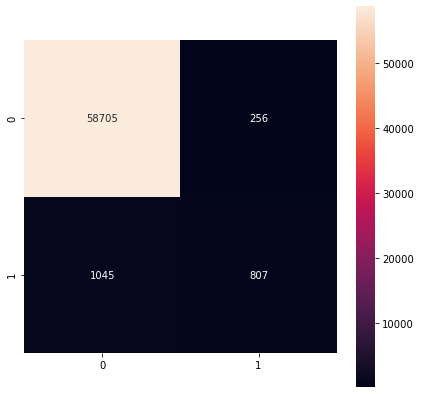

In [103]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_3,y_pred_3)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_3, y_pred_3)}')
print(f'Recall score: {recall_score(Y_test_3,y_pred_3)}')
print("")
matrix = confusion_matrix(Y_test_3, y_pred_3)
tn, fp, fn, tp = confusion_matrix(Y_test_3, y_pred_3).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_3,y_pred_3)}')
print(f'Precision score: {precision_score(Y_test_3,y_pred_3)}')
print(matrix)
print("")
print(classification_report(Y_test_3, y_pred_3))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

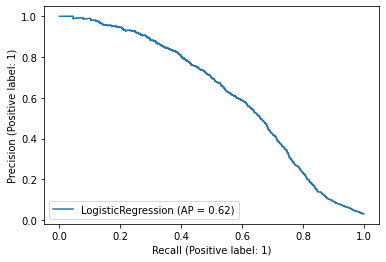

In [104]:
disp = plot_precision_recall_curve(lg3, X_test_3, Y_test_3)

In [105]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train_2,Y_train_2)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.5589756119131841 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [106]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train_2,Y_train_2)
# test
y_pred_2 = lg3.predict(X_test_2)

Accuracy Score: 0.9784290854129359
Area Under Curve: 0.7114456998719699
Recall score: 0.42655514898065866

Specificity: 0.9963362507632811
F1 score: 0.5541595925297114
Precision score: 0.7906976744186046
[[58740   216]
 [ 1097   816]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58956
           1       0.79      0.43      0.55      1913

    accuracy                           0.98     60869
   macro avg       0.89      0.71      0.77     60869
weighted avg       0.98      0.98      0.98     60869



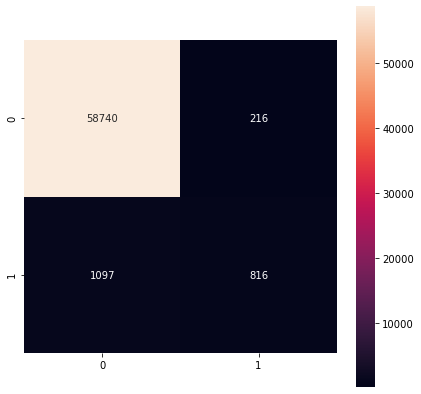

In [107]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_2,y_pred_2)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_2, y_pred_2)}')
print(f'Recall score: {recall_score(Y_test_2,y_pred_2)}')
print("")
matrix = confusion_matrix(Y_test_2, y_pred_2)
tn, fp, fn, tp = confusion_matrix(Y_test_2, y_pred_2).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_2,y_pred_2)}')
print(f'Precision score: {precision_score(Y_test_2,y_pred_2)}')
print(matrix)
print("")
print(classification_report(Y_test_2, y_pred_2))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

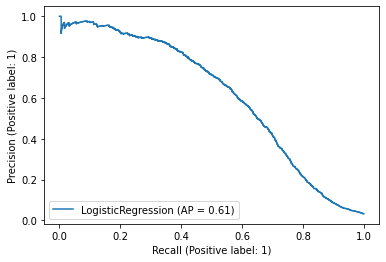

In [108]:
disp = plot_precision_recall_curve(lg3, X_test_2, Y_test_2)

In [109]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train_1,Y_train_1)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.5582636240577277 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [110]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train_1,Y_train_1)
# test
y_pred_1 = lg3.predict(X_test_1)

Accuracy Score: 0.9775153379278583
Area Under Curve: 0.7188117283519633
Recall score: 0.4417910447761194

Specificity: 0.9958324119278071
F1 score: 0.5650652243079859
Precision score: 0.7837599293909974
[[58542   245]
 [ 1122   888]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58787
           1       0.78      0.44      0.57      2010

    accuracy                           0.98     60797
   macro avg       0.88      0.72      0.78     60797
weighted avg       0.97      0.98      0.97     60797



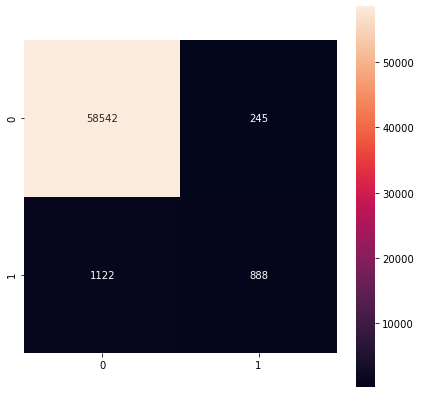

In [111]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_1,y_pred_1)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_1, y_pred_1)}')
print(f'Recall score: {recall_score(Y_test_1,y_pred_1)}')
print("")
matrix = confusion_matrix(Y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(Y_test_1, y_pred_1).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_1,y_pred_1)}')
print(f'Precision score: {precision_score(Y_test_1,y_pred_1)}')
print(matrix)
print("")
print(classification_report(Y_test_1, y_pred_1))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

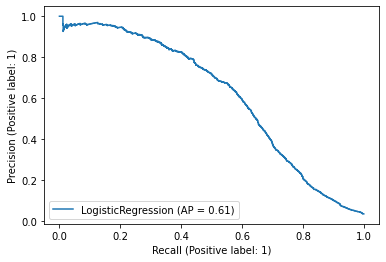

In [112]:
disp = plot_precision_recall_curve(lg3, X_test_1, Y_test_1)

## Results

In [113]:
list_acc_lr=[]
list_roc_lr=[]
list_recall_lr=[]
list_f1_lr=[]
list_precision_lr=[]


list_acc_lr.append(accuracy_score(Y_test_1,y_pred_1))
list_acc_lr.append(accuracy_score(Y_test_2,y_pred_2))
list_acc_lr.append(accuracy_score(Y_test_3,y_pred_3))
list_acc_lr.append(accuracy_score(Y_test_4,y_pred_4))
list_acc_lr.append(accuracy_score(Y_test_5,y_pred_5))

list_roc_lr.append(roc_auc_score(Y_test_1, y_pred_1))
list_roc_lr.append(roc_auc_score(Y_test_2, y_pred_2))
list_roc_lr.append(roc_auc_score(Y_test_3, y_pred_3))
list_roc_lr.append(roc_auc_score(Y_test_4, y_pred_4))
list_roc_lr.append(roc_auc_score(Y_test_5, y_pred_5))

list_recall_lr.append(recall_score(Y_test_1,y_pred_1))
list_recall_lr.append(recall_score(Y_test_2,y_pred_2))
list_recall_lr.append(recall_score(Y_test_3,y_pred_3))
list_recall_lr.append(recall_score(Y_test_4,y_pred_4))
list_recall_lr.append(recall_score(Y_test_5,y_pred_5))


list_f1_lr.append(f1_score(Y_test_1,y_pred_1))
list_f1_lr.append(f1_score(Y_test_2,y_pred_2))
list_f1_lr.append(f1_score(Y_test_3,y_pred_3))
list_f1_lr.append(f1_score(Y_test_4,y_pred_4))
list_f1_lr.append(f1_score(Y_test_5,y_pred_5))

list_precision_lr.append(precision_score(Y_test_1,y_pred_1))
list_precision_lr.append(precision_score(Y_test_2,y_pred_2))
list_precision_lr.append(precision_score(Y_test_3,y_pred_3))
list_precision_lr.append(precision_score(Y_test_4,y_pred_4))
list_precision_lr.append(precision_score(Y_test_5,y_pred_5))



print('Accuracy Score:',np.mean(list_acc_lr))
print('Area Under Curve:',np.mean(list_roc_lr))
print('Recall score:',np.mean(list_recall_lr))
print('F1 score:',np.mean(list_f1_lr))
print('Precision score:',np.mean(list_precision_lr))

Accuracy Score: 0.978048477280454
Area Under Curve: 0.7171696804991775
Recall score: 0.43856039516709266
F1 score: 0.5597044572317791
Precision score: 0.7737604514328924
